In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

## 表分析

### Base表

In [2]:
base_dtype = {'ID':"Int64",'注册时间':"Int64",'注册资本':"Int64",'行业':object,'区域':object,'企业类型':object,'控制人类型':object,'控制人持股比例':np.float64,'flag':"Int64"}
base_df = pd.read_csv("../data/base_verify1.csv", dtype=base_dtype)

In [313]:
base_df = base_df.set_index('ID')
base_df

,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人ID,控制人持股比例,flag
ID,,,,,,,,,
1500001,2010,6680,商业服务业,山东,股份有限公司,自然人,1.0,0.89,1
1500321,2001,9330,商业服务业,广东,股份有限公司,企业法人,321.0,0.72,1
1500395,2003,8670,交通运输业,广西,农民专业合作社,企业法人,395.0,0.60,1
1500614,2001,7730,工业,江西,集体所有制企业,企业法人,614.0,0.58,1
1501057,2002,6840,工业,福建,农民专业合作社,自然人,1057.0,0.84,1
...,...,...,...,...,...,...,...,...,...
5999996,2011,2170,零售业,湖北,农民专业合作社,自然人,29996.0,0.93,0
5999997,2013,9030,交通运输业,福建,集体所有制企业,企业法人,29997.0,0.73,0
5999998,2014,4510,服务业,湖南,股份有限公司,自然人,29998.0,0.64,0


In [312]:
pos_base = base_df.groupby(base_df['flag']).get_group(1)
neg_base = base_df.groupby(base_df['flag']).get_group(0)

In [314]:
pos_id = pos_base.index
neg_id = neg_base.index

In [315]:
pos_base.describe()

,注册时间,注册资本,控制人ID,控制人持股比例,flag
count,8845.000000,8829.000000,8844.000000,8837.000000,8928.0
mean,2007.062408,5014.489750,15001.790366,0.753933,1.0
std,4.338873,2859.655906,8653.339559,0.144936,0.0
min,2000.000000,100.000000,1.000000,0.510000,1.0
25%,2003.000000,2570.000000,7606.500000,0.630000,1.0
50%,2007.000000,5000.000000,14998.000000,0.750000,1.0
75%,2011.000000,7460.000000,22464.500000,0.880000,1.0
max,2014.000000,10000.000000,29995.000000,1.000000,1.0


In [316]:
neg_base.describe()

,注册时间,注册资本,控制人ID,控制人持股比例,flag
count,21417.000000,21433.000000,21456.000000,21428.000000,21650.0
mean,2007.031470,5037.889703,19026.504707,0.754530,0.0
std,4.339395,2851.298489,6341.395480,0.145137,0.0
min,2000.000000,100.000000,8034.000000,0.510000,0.0
25%,2003.000000,2570.000000,13540.750000,0.630000,0.0
50%,2007.000000,5030.000000,19020.500000,0.750000,0.0
75%,2011.000000,7480.000000,24524.250000,0.880000,0.0
max,2014.000000,10000.000000,30000.000000,1.000000,0.0


In [16]:
pos_base["企业类型"].value_counts()

有限责任公司     1815
农民专业合作社    1777
集体所有制企业    1761
股份有限公司     1750
合伙企业       1729
Name: 企业类型, dtype: int64

In [17]:
neg_base["企业类型"].value_counts()

合伙企业       4412
集体所有制企业    4312
股份有限公司     4248
农民专业合作社    4237
有限责任公司     4224
Name: 企业类型, dtype: int64

有限责任公司的正例似乎较多。

### Knowledge表

In [21]:
knowledge_dtype = "Int64"
knowledge_df = pd.read_csv("../data/paient_information_verify1.csv", dtype=knowledge_dtype)

In [44]:
pos_knowledge = knowledge_df[base_df.flag == 1]
neg_knowledge = knowledge_df[base_df.flag == 0]

In [45]:
pos_knowledge.mean()

专利     0.338615
商标     0.364840
著作权    0.361080
dtype: float64

In [46]:
neg_knowledge.mean()

专利     0.344997
商标     0.365053
著作权    0.378301
dtype: float64

负例的均值略微高一些。

### money表

In [47]:
money_dtype = {'ID':"Int64",'year':"Int64",'债权融资额度':np.float64,'债权融资成本':np.float64,'股权融资额度':np.float64,'股权融资成本':np.float64,'内部融资和贸易融资额度':np.float64,'内部融资和贸易融资成本':np.float64,'项目融资和政策融资额度':np.float64,'项目融资和政策融资成本':np.float64}
money_df = pd.read_csv("../data/money_information_verify1.csv", dtype=money_dtype)

In [48]:
money_df

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,1500001,2015,0.0,0.00,0.00,0.0000,0.0,0.000,334.0,20.040
1,1500321,2015,0.0,0.00,0.00,0.0000,721022.4,43261.344,0.0,0.000
2,1500395,2015,0.0,0.00,0.00,0.0000,0.0,0.000,8323.2,499.392
3,1500614,2015,0.0,0.00,31167.36,1246.6944,0.0,0.000,0.0,0.000
4,1501057,2015,0.0,0.00,0.00,0.0000,490838.4,29450.304,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
92647,5999996,2017,0.0,0.00,3958.08,158.3232,0.0,0.000,0.0,0.000
92648,5999997,2017,14448.0,1155.84,0.00,0.0000,0.0,0.000,0.0,0.000
92649,5999998,2017,0.0,0.00,0.00,0.0000,18265.5,1095.930,0.0,0.000
92650,5999999,2017,0.0,0.00,0.00,0.0000,0.0,0.000,821.7,49.302


In [50]:
money_2015 = money_df[money_df.year == 2015]
money_2016 = money_df[money_df.year == 2016]
money_2017 = money_df[money_df.year == 2017]

In [63]:
pos_money15 = money_2015[money_2015.ID.isin(pos_id)]
neg_money15 = money_2015[money_2015.ID.isin(neg_id)]
pos_money16 = money_2016[money_2016.ID.isin(pos_id)]
neg_money16 = money_2016[money_2016.ID.isin(neg_id)]
pos_money17 = money_2017[money_2017.ID.isin(pos_id)]
neg_money17 = money_2017[money_2017.ID.isin(neg_id)]

In [64]:
pos_money15.describe()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
count,8.831000e+03,8831.0,8741.000000,8730.000000,8745.000000,8735.000000,8.766000e+03,8741.000000,8741.000000,8748.000000
mean,2.467405e+06,2015.0,2931.991877,234.805242,4310.363776,173.033099,2.261761e+04,1343.766129,876.467509,52.538015
std,5.627744e+05,0.0,7991.802980,639.286546,15902.240710,638.166782,7.463335e+04,4433.048153,2626.708615,157.563480
min,1.500001e+06,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.979923e+06,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2.458494e+06,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,2.949697e+06,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,68.400000,4.477500
max,3.449944e+06,2015.0,71025.000000,5682.000000,311400.000000,12456.000000,1.027950e+06,61677.000000,28800.000000,1728.000000


In [65]:
neg_money15.describe()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
count,2.142300e+04,21423.0,21206.000000,21208.000000,21205.00000,21210.000000,2.121000e+04,21196.000000,21212.000000,21229.000000
mean,5.989029e+06,2015.0,2958.706545,237.414070,4518.57691,181.201251,2.267779e+04,1355.895809,940.541547,56.466492
std,6.341302e+03,0.0,7973.103792,638.827888,16357.78224,655.725716,7.163489e+04,4289.855421,2827.872691,169.594956
min,5.978034e+06,2015.0,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,5.983540e+06,2015.0,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,5.989031e+06,2015.0,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,5.994522e+06,2015.0,64.750000,9.300000,0.00000,0.000000,0.000000e+00,0.000000,22.200000,1.560000
max,5.999999e+06,2015.0,73425.000000,5874.000000,283057.50000,11322.300000,1.044810e+06,62688.600000,33562.500000,2013.750000


In [90]:
(pos_money15.drop(columns=['ID', 'year']) > 0).all(axis=1).sum()

0

In [91]:
(pos_money15.drop(columns=['ID', 'year']) > 0).any(axis=1).sum()

8830

In [118]:
plt.rcParams['font.sans-serif'] = ['SimHei']

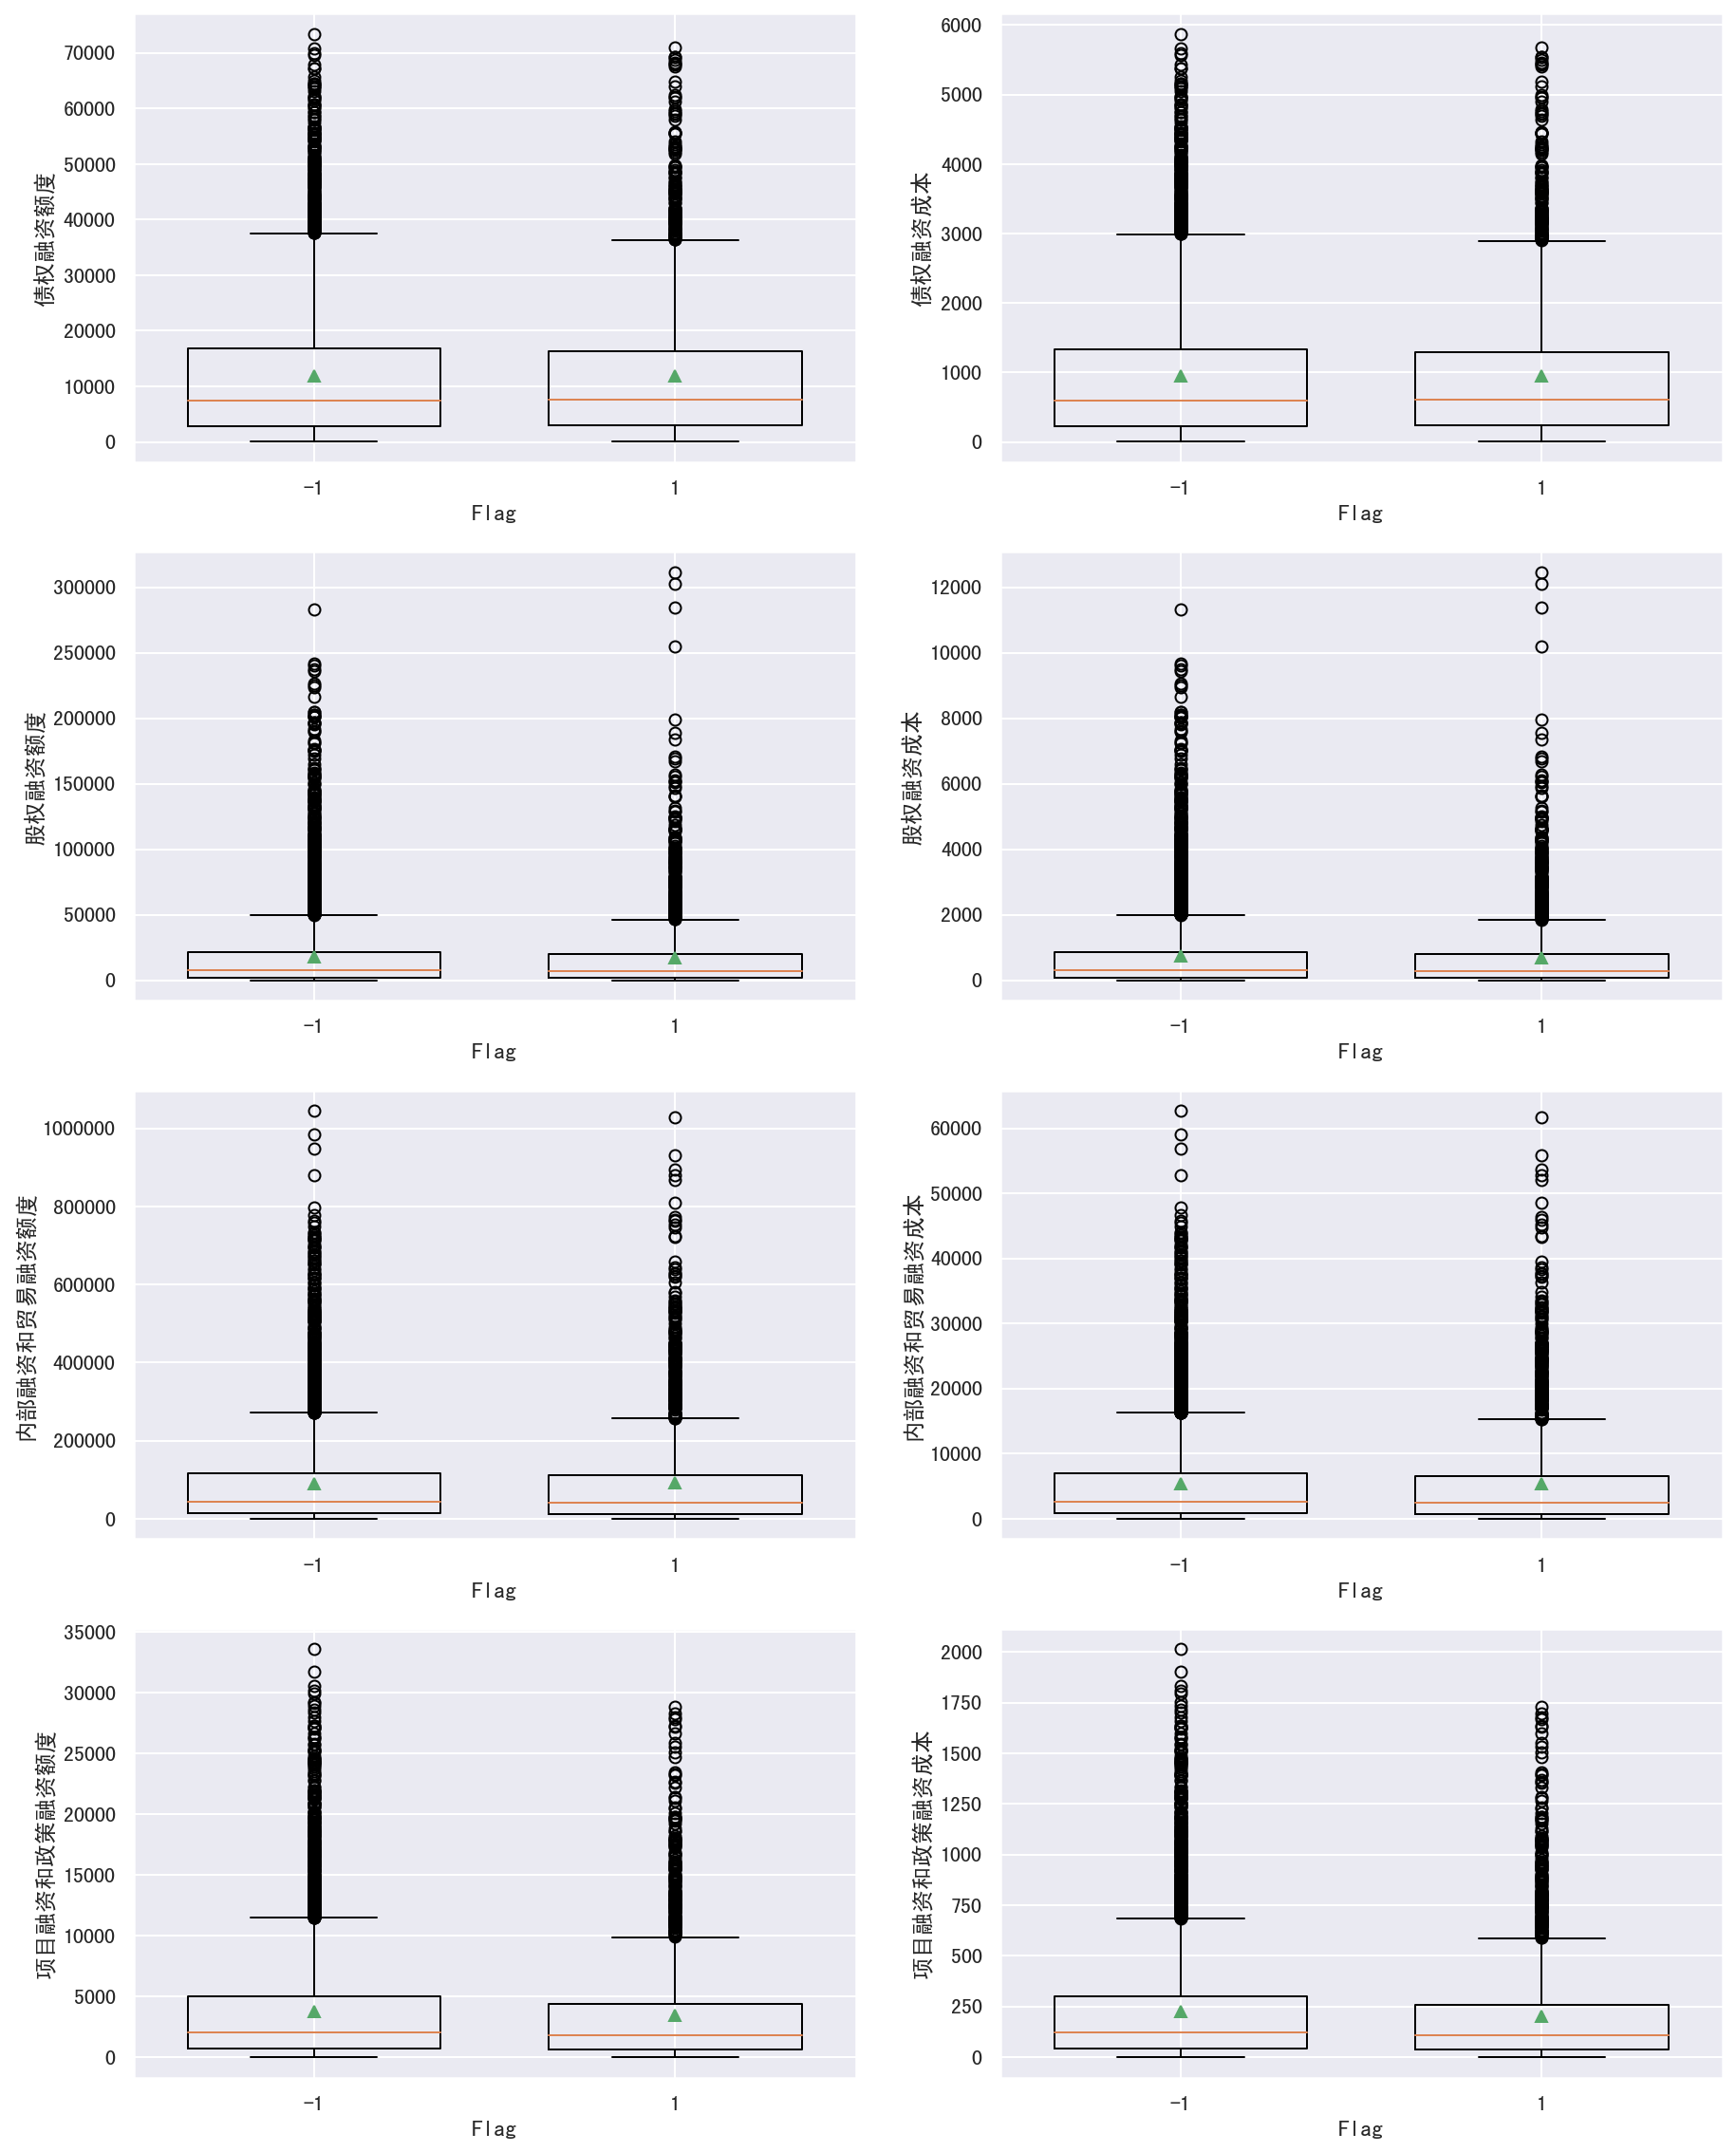

In [122]:
columns = money_df.columns.drop(['ID', 'year'])
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for axi, column in zip(axes.flat, columns):
    pos_valid = pos_money15[pos_money15[column] > 0][column]
    neg_valid = neg_money15[neg_money15[column] > 0][column]
    axi.boxplot([neg_valid, pos_valid], widths=0.7, showmeans=True)
    axi.set_xlabel('Flag')
    axi.set_ylabel(column)
    axi.set_xticks([1, 2])
    axi.set_xticklabels(['-1', '1']);

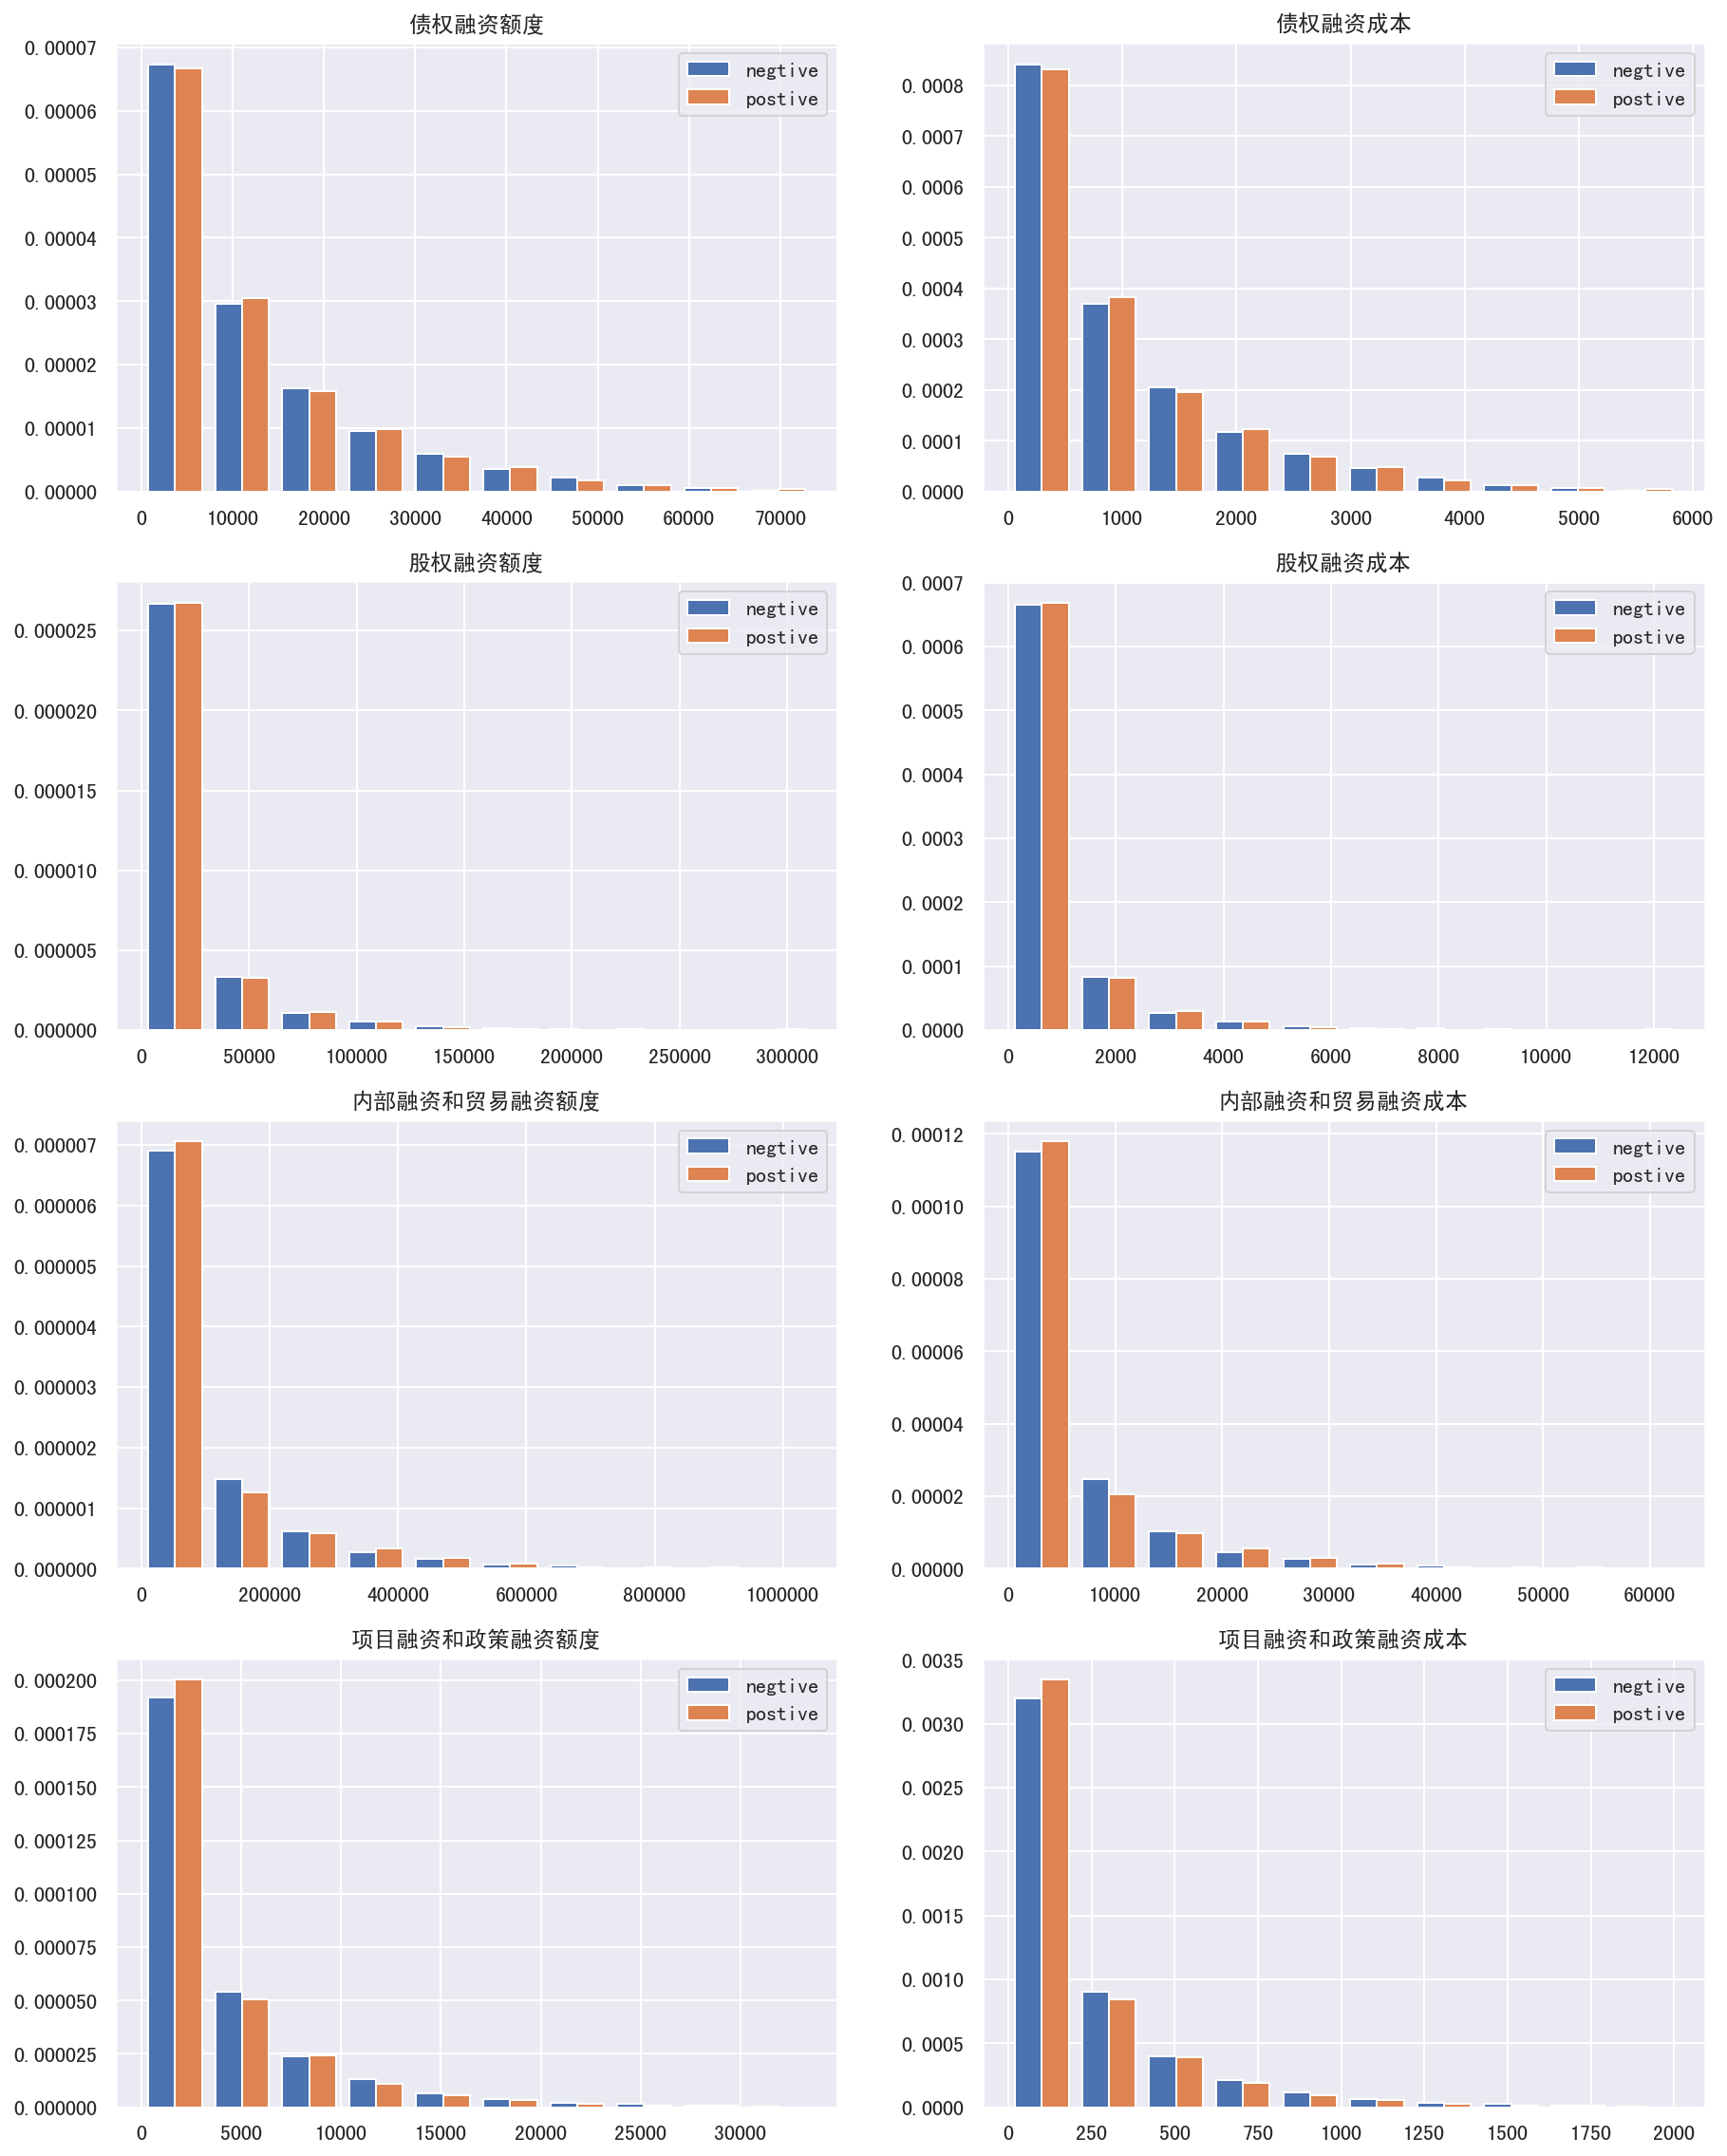

In [123]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for axi, column in zip(axes.flat, columns):
    pos_valid = pos_money15[pos_money15[column] > 0][column]
    neg_valid = neg_money15[neg_money15[column] > 0][column]
    axi.hist([neg_valid, pos_valid], density=True, label=['negtive', 'postive'])
    axi.set_title(column)
    axi.legend()

In [138]:
def get_diff(past, present):
    past = past.set_index('ID', drop=False)
    present = present.set_index('ID', drop=False)
    diff = present - past
    diff.drop(columns=['ID','year'], inplace=True)
    diff.rename(columns=lambda x: x+'差额', inplace=True)
    diff['ID'] = diff.index
    return diff

In [139]:
pos_money_diff = get_diff(pos_money15, pos_money17)
neg_money_diff = get_diff(neg_money15, neg_money17)

In [147]:
pos_money_diff.describe()

,债权融资额度差额,债权融资成本差额,股权融资额度差额,股权融资成本差额,内部融资和贸易融资额度差额,内部融资和贸易融资成本差额,项目融资和政策融资额度差额,项目融资和政策融资成本差额,ID
count,8577.000000,8558.000000,8584.000000,8570.000000,8.607000e+03,8567.000000,8560.000000,8582.000000,8.928000e+03
mean,751.768101,59.767946,1070.763369,41.835216,6.375808e+03,393.158416,220.961449,12.614127,2.467623e+06
std,11827.819607,948.779549,24065.785845,962.811696,1.086177e+05,6497.472486,3969.508521,236.438632,5.627630e+05
min,-71025.000000,-5682.000000,-311400.000000,-12456.000000,-1.027950e+06,-61677.000000,-28800.000000,-1728.000000,1.500001e+06
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.979708e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.458862e+06
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.949748e+06
max,84830.000000,6786.400000,261427.200000,10457.088000,1.215432e+06,72925.920000,35720.000000,2143.200000,3.449944e+06


In [148]:
neg_money_diff.describe()

,债权融资额度差额,债权融资成本差额,股权融资额度差额,股权融资成本差额,内部融资和贸易融资额度差额,内部融资和贸易融资成本差额,项目融资和政策融资额度差额,项目融资和政策融资成本差额,ID
count,20804.000000,20789.000000,20774.000000,20803.000000,2.079900e+04,20795.000000,20786.000000,20782.000000,2.164800e+04
mean,794.895982,61.431349,1222.392056,48.724243,6.889362e+03,419.953755,166.603560,10.294295,5.989022e+06
std,12032.009203,962.028598,24829.994633,995.679328,1.107293e+05,6664.864803,4130.142699,249.115980,6.340627e+03
min,-70875.000000,-5670.000000,-241628.800000,-9665.152000,-1.044810e+06,-62688.600000,-31745.000000,-1904.700000,5.978034e+06
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.983533e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.989020e+06
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.994515e+06
max,82110.000000,6568.800000,287287.500000,11491.500000,1.257150e+06,75429.000000,40970.000000,2458.200000,5.999999e+06


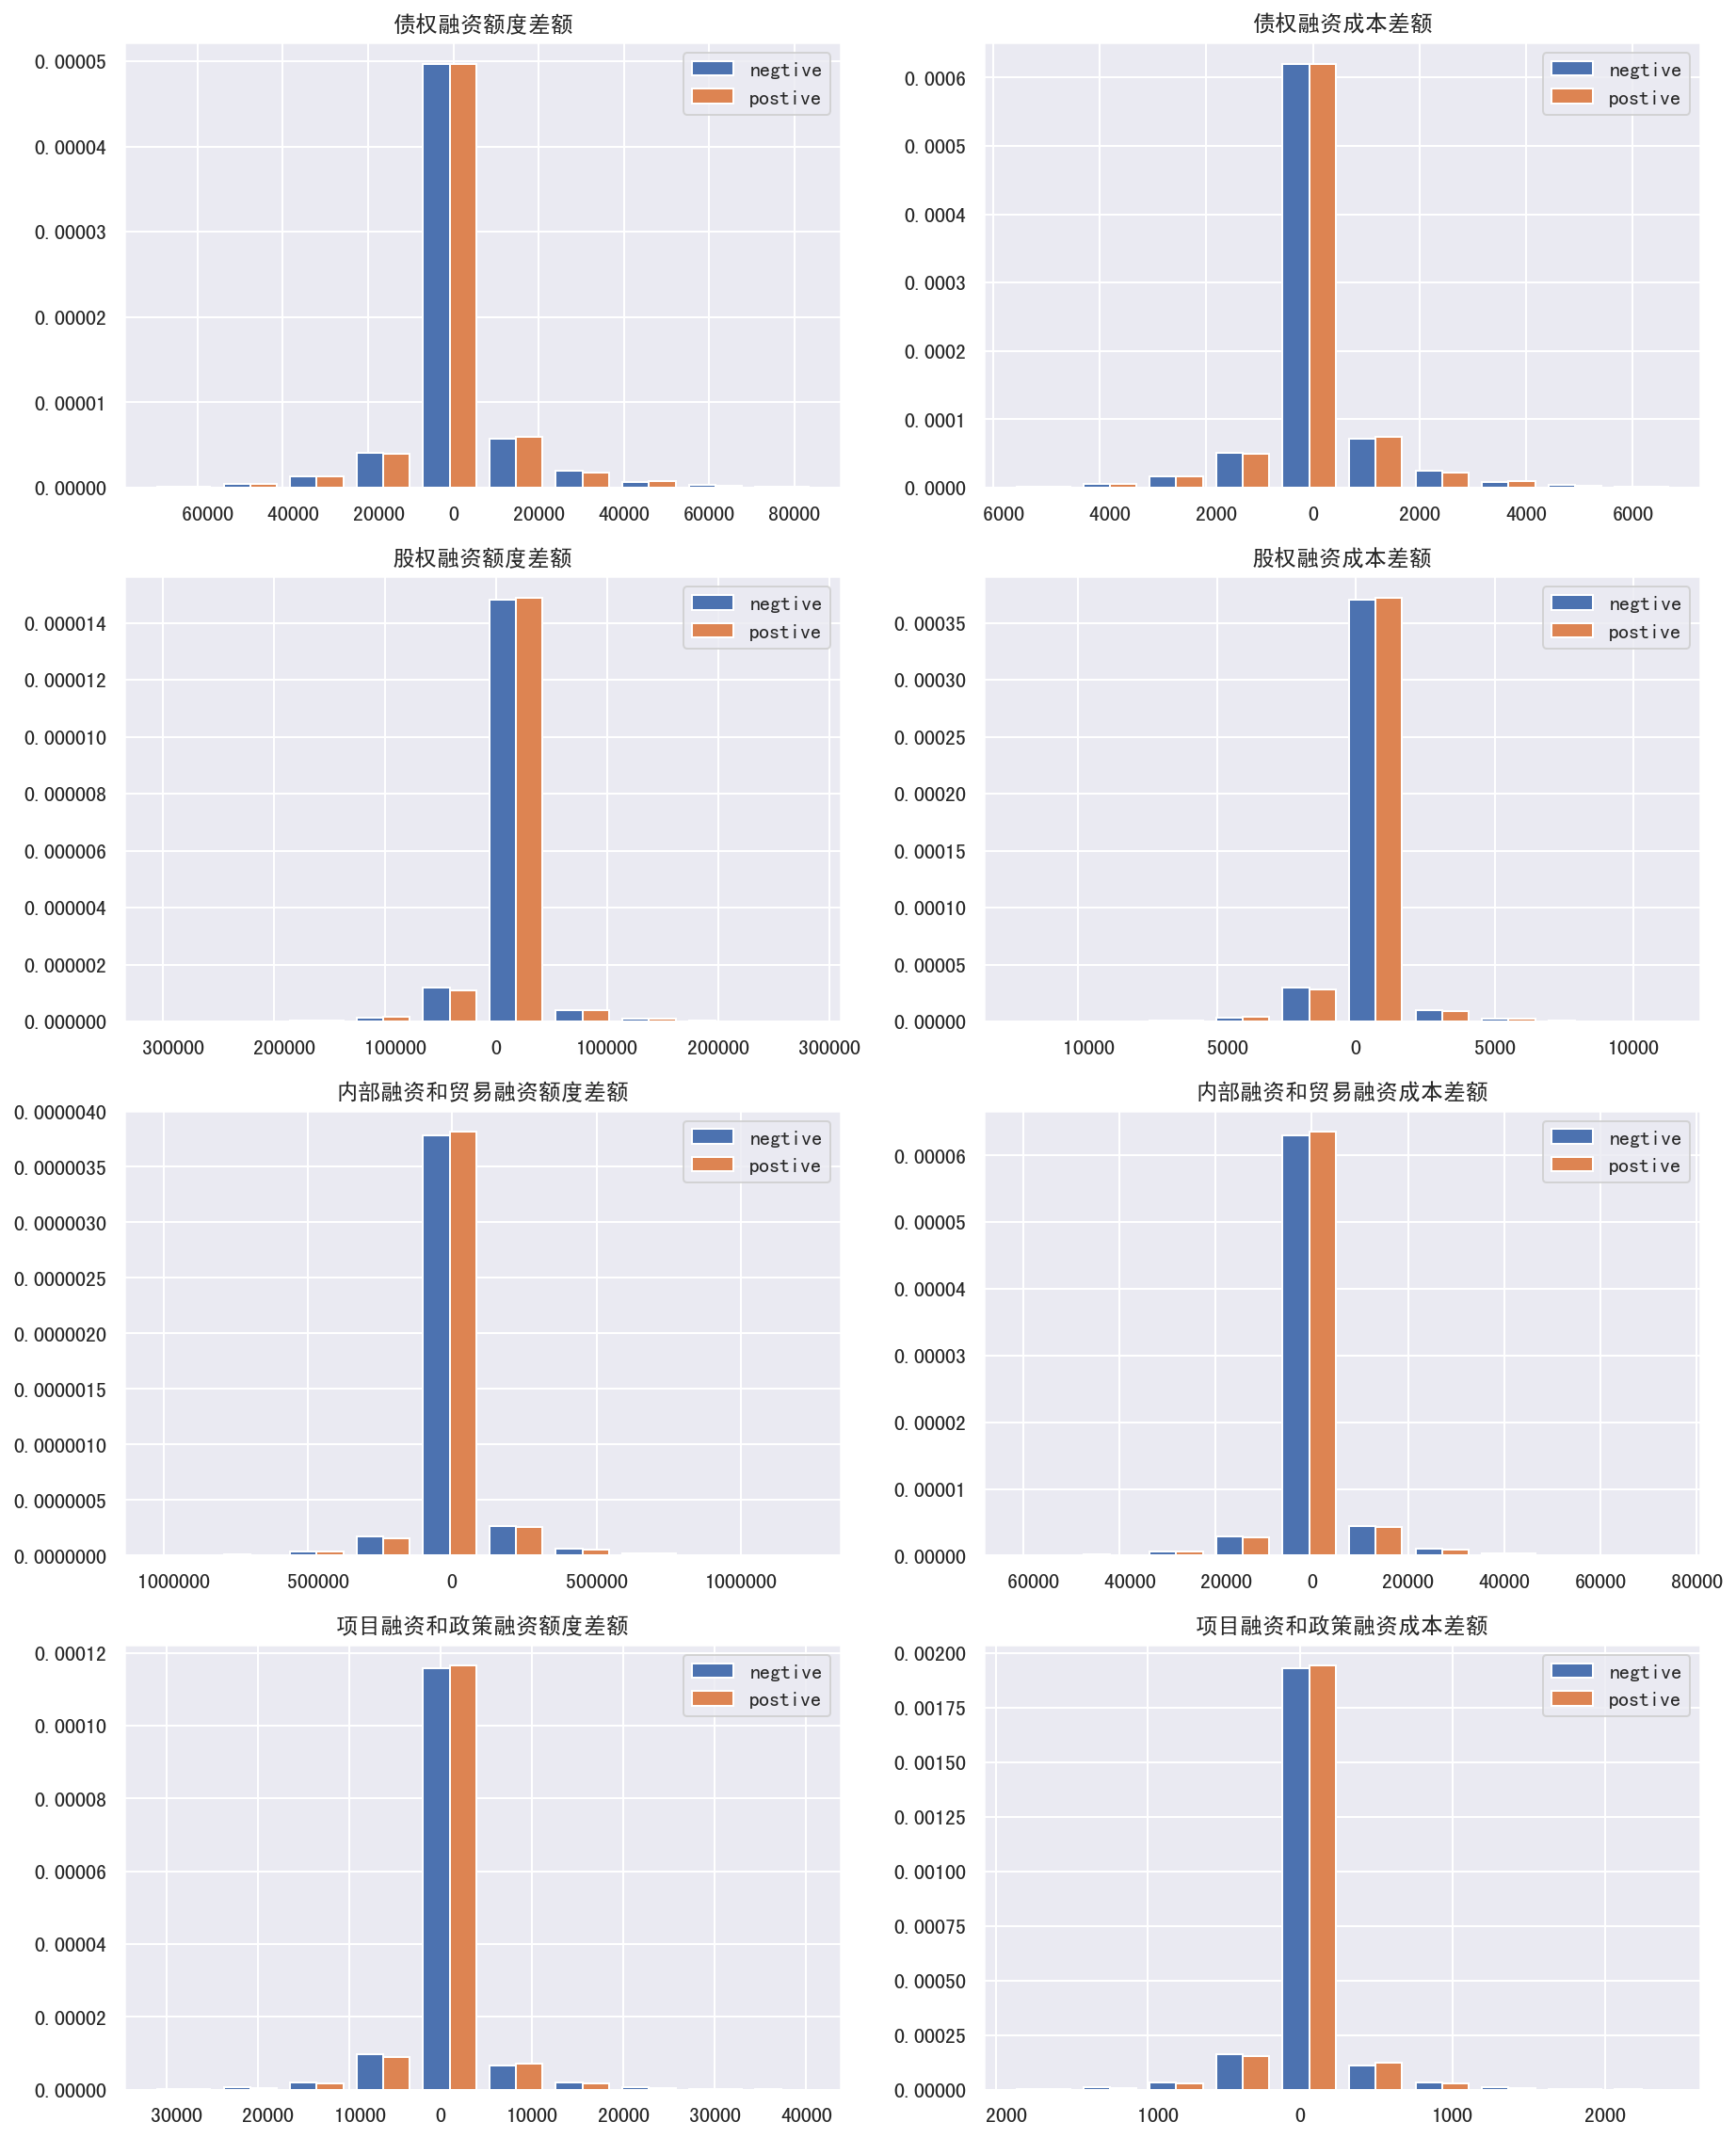

In [153]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for axi, column in zip(axes.flat, diff_columns):
    axi.hist([neg_money_diff[column], pos_money_diff[column]], density=True, label=['negtive', 'postive']);
    axi.set_title(column)
    axi.legend()

### year表

In [401]:
year_dtype = {'ID':"Int64",'year':"Int64",'从业人数':"Int64",'资产总额':np.float64,'负债总额':np.float64,'营业总收入':np.float64,'主营业务收入':np.float64,'利润总额':np.float64,'净利润':np.float64,'纳税总额':np.float64,'所有者权益合计':np.float64}
year_df = pd.read_csv("../data/year_report_verify1.csv", dtype=year_dtype)

In [402]:
year_df = year_df.set_index('ID')
year_df

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
ID,,,,,,,,,,
1500001,2015,939,33400.0,13360.0,150300.0,120240.0,30060.0,-15030.0,0.0,20040.0
1500321,2015,228,522480.0,256575.0,2403408.0,961363.2,240340.8,NaN,0.0,265905.0
1500395,2015,111,416160.0,814980.0,957168.0,478584.0,287150.4,-95716.8,0.0,-398820.0
1500614,2015,543,108220.0,100490.0,519456.0,415564.8,155836.8,-51945.6,0.0,7730.0
1501057,2015,733,355680.0,697680.0,1636128.0,654451.2,327225.6,-163612.8,0.0,-342000.0
...,...,...,...,...,...,...,...,...,...,...
5999996,2017,803,13020.0,5425.0,49476.0,19790.4,19790.4,19790.4,19790.4,7595.0
5999997,2017,76,144480.0,203175.0,390096.0,234057.6,39009.6,0.0,156038.4,-58695.0
5999998,2017,841,67650.0,63140.0,60885.0,30442.5,30442.5,-6088.5,0.0,4510.0


In [191]:
year_2015 = year_df[year_df.year == 2015]
year_2016 = year_df[year_df.year == 2016]
year_2017 = year_df[year_df.year == 2017]

In [193]:
pos_year15 = year_2015[year_2015.index.isin(pos_id)]
neg_year15 = year_2015[year_2015.index.isin(neg_id)]
pos_year16 = year_2016[year_2016.index.isin(pos_id)]
neg_year16 = year_2016[year_2016.index.isin(neg_id)]
pos_year17 = year_2017[year_2017.index.isin(pos_id)]
neg_year17 = year_2017[year_2017.index.isin(neg_id)]

In [194]:
pos_year15.describe()

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
count,8834.0,8754.000000,8731.000000,8.748000e+03,8.743000e+03,8.738000e+03,8.742000e+03,8747.000000,8751.0,8748.000000
mean,2015.0,509.655586,117855.714122,1.399136e+05,3.005415e+05,1.802071e+05,8.982149e+04,-29994.152098,0.0,-21897.602881
std,0.0,281.784255,123972.313421,1.753613e+05,4.080705e+05,2.535766e+05,1.415046e+05,40713.466091,0.0,95033.877044
min,2015.0,20.000000,100.000000,0.000000e+00,6.400000e+01,2.560000e+01,1.340000e+01,-342650.000000,0.0,-695690.000000
25%,2015.0,269.000000,27955.000000,2.480875e+04,4.671950e+04,2.667030e+04,1.128788e+04,-37697.250000,0.0,-41583.750000
50%,2015.0,510.000000,73500.000000,7.438000e+04,1.410000e+05,8.239680e+04,3.644100e+04,-14035.200000,0.0,600.000000
75%,2015.0,755.000000,166600.000000,1.852300e+05,3.773105e+05,2.224898e+05,1.050418e+05,-4637.850000,0.0,8920.000000
max,2015.0,1000.000000,748500.000000,1.410440e+06,3.426500e+06,2.398550e+06,1.557000e+06,-6.400000,0.0,365180.000000


In [195]:
neg_year15.describe()

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
count,21429.0,21224.000000,21197.000000,2.123800e+04,2.118900e+04,2.123400e+04,2.123000e+04,2.119600e+04,2.122000e+04,21200.000000
mean,2015.0,510.725170,120089.422088,1.443210e+05,3.041529e+05,1.827036e+05,9.032155e+04,4.680149e+04,1.019615e+05,-24268.422406
std,0.0,283.837316,125267.874380,1.822655e+05,4.027385e+05,2.521055e+05,1.387885e+05,1.065357e+05,1.723133e+05,99538.434004
min,2015.0,20.000000,100.000000,0.000000e+00,1.100000e+02,7.200000e+01,1.560000e+01,-3.304125e+05,0.000000e+00,-695690.000000
25%,2015.0,266.000000,28440.000000,2.515500e+04,4.680000e+04,2.707200e+04,1.147640e+04,0.000000e+00,5.404050e+03,-44727.500000
50%,2015.0,510.000000,75600.000000,7.561000e+04,1.467180e+05,8.517600e+04,3.780000e+04,9.857000e+03,3.562560e+04,620.000000
75%,2015.0,757.000000,170800.000000,1.896712e+05,3.947400e+05,2.325537e+05,1.071084e+05,5.535250e+04,1.199328e+05,8800.000000
max,2015.0,1000.000000,743250.000000,1.410440e+06,3.482700e+06,2.472960e+06,1.501532e+06,1.148224e+06,2.089620e+06,370880.000000


**净利润**和**纳税总额**这两个特征上分布差异明显。

In [322]:
pos_ind_year15 = pd.merge(left=pos_base["行业"], right=pos_year15, left_index=True, right_index=True, how="right")

In [335]:
from IPython.display import display
for column in pos_year15.columns:
    print(column)
    display(pos_ind_year15.groupby(pos_ind_year15["行业"]).describe()[column])

year


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1560.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
商业服务业,1437.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
工业,1467.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
服务业,1443.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
社区服务,1423.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
零售业,1428.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0


从业人数


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1549.0,505.969658,282.365876,20.0,264.0,503.0,755.0,1000.0
商业服务业,1419.0,508.883016,285.138539,21.0,260.5,518.0,764.0,1000.0
工业,1454.0,509.995873,278.969204,20.0,274.0,500.0,748.0,1000.0
服务业,1433.0,515.110956,280.250286,20.0,278.0,517.0,746.0,1000.0
社区服务,1410.0,517.507801,283.185056,21.0,274.0,524.0,762.0,999.0
零售业,1413.0,500.249823,280.547301,20.0,263.0,490.0,746.0,1000.0


资产总额


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1542.0,115257.302205,115995.189845,480.0,30420.0,74950.0,166095.0,697200.0
商业服务业,1422.0,120946.279887,130623.077428,360.0,27270.0,72135.0,170590.0,748500.0
工业,1449.0,116129.979296,123091.350800,300.0,27810.0,72720.0,158600.0,725250.0
服务业,1429.0,119771.728481,127018.772314,440.0,25920.0,77440.0,169000.0,726000.0
社区服务,1406.0,113833.719772,116229.431395,100.0,28350.0,71840.0,166740.0,720750.0
零售业,1409.0,122000.667140,130945.844895,200.0,27900.0,73040.0,171720.0,710250.0


负债总额


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1545.0,140686.122977,170971.664485,0.0,26235.0,77100.0,190240.0,1164760.0
商业服务业,1428.0,143251.439076,182775.858238,0.0,24375.0,74840.0,194465.0,1081600.0
工业,1454.0,135412.049519,172634.243253,0.0,23715.0,72310.0,175877.5,1366200.0
服务业,1430.0,140993.877622,174596.045151,0.0,23940.0,74595.0,192660.0,1091580.0
社区服务,1403.0,137512.409123,170347.571956,0.0,26240.0,70890.0,182380.0,1410440.0
零售业,1412.0,142962.567280,181232.883032,0.0,24910.0,77125.0,181852.5,1351020.0


营业总收入


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1542.0,297491.408560,388798.501369,420.0,52387.50,142240.5,383008.50,2587000.0
商业服务业,1420.0,310880.246479,437806.303183,387.0,44861.00,145860.0,367294.50,3218550.0
工业,1450.0,296152.555862,401258.457715,134.0,45180.00,136995.0,365283.75,3101000.0
服务业,1430.0,306811.462238,413564.270065,306.0,43768.25,144253.5,398981.25,2782500.0
社区服务,1410.0,292164.426950,401976.928534,396.0,49275.00,135837.0,369135.00,3027150.0
零售业,1416.0,300735.090395,405128.734987,64.0,44820.00,141060.0,376800.00,3426500.0


主营业务收入


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1541.0,179751.959572,239872.256818,168.0,29610.0,84645.0,229284.0,1785315.0
商业服务业,1424.0,188339.263202,277450.438853,259.0,26405.1,83832.0,219780.0,2313000.0
工业,1458.0,182207.113443,265697.589943,80.4,25811.1,79724.4,214374.0,2062080.0
服务业,1425.0,182909.183298,258705.172229,102.4,24883.2,82224.0,233798.4,1958880.0
社区服务,1409.0,172969.304116,242390.408731,277.2,27888.0,80371.2,208754.0,1816290.0
零售业,1405.0,176421.190391,237538.706434,25.6,26560.8,84067.2,223965.0,2398550.0


利润总额


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1550.0,88416.584645,137982.389540,48.0,12516.0,36937.5,104559.0,1273387.5
商业服务业,1417.0,90602.972406,139228.237352,51.8,10944.0,37536.0,105900.0,1422000.0
工业,1446.0,91348.386515,147364.077466,13.4,10931.4,36084.0,101370.6,1288800.0
服务业,1431.0,93191.478896,145257.346066,47.2,10284.6,34710.0,112691.5,1113000.0
社区服务,1409.0,87516.421008,141448.018657,79.2,12376.0,36168.0,95940.0,1513575.0
零售业,1415.0,89251.253286,140088.179941,19.2,10852.0,36450.0,104905.2,1557000.0


净利润


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1546.0,-29431.746701,38109.349870,-258700.0,-38204.25,-14190.75,-5168.700,-42.0
商业服务业,1421.0,-30925.599719,43438.067264,-321855.0,-36534.40,-14580.00,-4560.000,-38.7
工业,1457.0,-29841.785175,40592.636518,-310100.0,-37798.20,-13671.00,-4492.800,-13.4
服务业,1430.0,-30654.884266,41383.599705,-278250.0,-39810.15,-14363.00,-4345.875,-25.6
社区服务,1407.0,-29269.383866,40329.398094,-302715.0,-36724.20,-13622.40,-4870.500,-39.6
零售业,1411.0,-29996.699433,40472.542371,-342650.0,-37752.50,-14000.00,-4446.500,-6.4


纳税总额


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
商业服务业,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
工业,1454.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
服务业,1426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
社区服务,1408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
零售业,1417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


所有者权益合计


,count,mean,std,min,25%,50%,75%,max
行业,,,,,,,,
交通运输业,1547.0,-24200.617324,91314.662230,-574510.0,-44677.5,370.0,8742.5,317015.0
商业服务业,1424.0,-22875.933989,99927.491541,-532350.0,-41535.0,730.0,9130.0,353225.0
工业,1453.0,-19058.141776,94117.969222,-673200.0,-39420.0,780.0,9360.0,315020.0
服务业,1431.0,-21628.609364,92701.664130,-537880.0,-40750.0,540.0,8805.0,304695.0
社区服务,1405.0,-22996.419929,91773.775088,-695690.0,-40160.0,380.0,8500.0,365180.0
零售业,1414.0,-21138.391089,100493.252204,-665720.0,-43540.0,280.0,8847.5,333640.0


对行业分类没什么用，每个行业的数据都差不多。

## 企业画像维度分析

### 基本属性维度

1. 行业 ✅
2. 司龄 ✅
3. 区域 ✅
4. 规模 需计算

In [171]:
basd_df["行业"].value_counts()

交通运输业    5220
服务业      5120
商业服务业    5109
工业       5066
零售业      5055
社区服务     5037
Name: 行业, dtype: int64

In [399]:
base_df[["行业"]]

,行业
ID,
1500001,商业服务业
1500321,商业服务业
1500395,交通运输业
1500614,工业
1501057,工业
...,...
5999996,零售业
5999997,交通运输业
5999998,服务业


In [197]:
year_2017[["从业人数", "资产总额", "营业总收入"]]

,从业人数,资产总额,营业总收入
ID,,,
1500001,744,233800.0,303940.0
1500321,942,298560.0,1313664.0
1500395,689,121380.0,279174.0
1500614,265,123680.0,210256.0
1501057,270,102600.0,30780.0
...,...,...,...
5999996,803,13020.0,49476.0
5999997,76,144480.0,390096.0
5999998,841,67650.0,60885.0


In [198]:
year_2016[["从业人数", "资产总额", "营业总收入"]]

,从业人数,资产总额,营业总收入
ID,,,
1500001,977,200400.0,280560.0
1500321,116,139950.0,531810.0
1500395,867,112710.0,405756.0
1500614,461,115950.0,231900.0
1501057,761,191520.0,842688.0
...,...,...,...
5999996,473,32550.0,39060.0
5999997,356,81270.0,398223.0
5999998,398,45100.0,144320.0


In [199]:
year_2015[["从业人数", "资产总额", "营业总收入"]]

,从业人数,资产总额,营业总收入
ID,,,
1500001,939,33400.0,150300.0
1500321,228,522480.0,2403408.0
1500395,111,416160.0,957168.0
1500614,543,108220.0,519456.0
1501057,733,355680.0,1636128.0
...,...,...,...
5999996,835,8680.0,24304.0
5999997,362,90300.0,397320.0
5999998,930,13530.0,4059.0


In [201]:
(_197+_198+_199)/3

,从业人数,资产总额,营业总收入
ID,,,
1500001,886.666667,155866.666667,2.449333e+05
1500321,428.666667,320330.000000,1.416294e+06
1500395,555.666667,216750.000000,5.473660e+05
1500614,423.000000,115950.000000,3.205373e+05
1501057,588.000000,216600.000000,8.365320e+05
...,...,...,...
5999995,500.333333,373133.333333,6.349700e+05
5999996,703.666667,18083.333333,3.761333e+04
5999997,264.666667,105350.000000,3.952130e+05


In [202]:
_201.describe()

,从业人数,资产总额,营业总收入
count,29117.000000,29031.000000,2.908500e+04
mean,510.008220,134689.007038,3.432144e+05
std,163.398041,116899.392092,3.374322e+05
min,48.666667,440.000000,2.990000e+02
25%,394.333333,44323.333333,1.002033e+05
50%,509.666667,100413.333333,2.329000e+05
75%,626.000000,195078.333333,4.784960e+05
max,973.000000,749600.000000,3.022030e+06


In [209]:
_173.set_index('ID')

,行业
ID,
1500001,商业服务业
1500321,商业服务业
1500395,交通运输业
1500614,工业
1501057,工业
...,...
5999996,零售业
5999997,交通运输业
5999998,服务业


In [211]:
scale_df = pd.concat([_209, _201], axis=1)

In [259]:
def scale_classify(row):
    if row["行业"] == "交通运输业":
        x, y = row["从业人数"], row["营业总收入"]
        return ((x>=20) + (y>=100) + (x>=300) + (y>=3000) + (x>=1000) + (y>=30000)) // 2
    if row["行业"] == "工业":
        x, y = row["从业人数"], row["营业总收入"]
        return ((x>=20) + (y>=300) + (x>=300) + (y>=2000) + (x>=1000) + (y>=40000)) // 2
    if row["行业"] == "零售业":
        x, y = row["从业人数"], row["营业总收入"]
        return ((x>=10) + (y>=100) + (x>=50) + (y>=500) + (x>=300) + (y>=20000)) // 2
    if row["行业"] in ["服务业", "商业服务业", "社区服务"]:
        x, y = row["从业人数"], row["资产总额"]
        return ((x>=10) + (y>=100) + (x>=100) + (y>=8000) + (x>=300) + (y>=120000)) // 2
    x = row["从业人数"]
    return (x>=10) + (x>=100) + (x>=300)

In [260]:
scale_df.apply(scale_classify, axis=1)

ID
1500001    3
1500321    3
1500395    2
1500614    2
1501057    2
          ..
5999996    3
5999997    2
5999998    2
5999999    2
6000000    0
Length: 30885, dtype: int64

In [263]:
scale_df["企业规模"] = _260

In [264]:
scale_df

,行业,从业人数,资产总额,营业总收入,企业规模
ID,,,,,
1500001,商业服务业,886.666667,155866.666667,2.449333e+05,3
1500321,商业服务业,428.666667,320330.000000,1.416294e+06,3
1500395,交通运输业,555.666667,216750.000000,5.473660e+05,2
1500614,工业,423.000000,115950.000000,3.205373e+05,2
1501057,工业,588.000000,216600.000000,8.365320e+05,2
...,...,...,...,...,...
5999996,零售业,703.666667,18083.333333,3.761333e+04,3
5999997,交通运输业,264.666667,105350.000000,3.952130e+05,2
5999998,服务业,723.000000,42093.333333,6.975467e+04,2


### 经营状况维度

- **销售净利率**

该指标反映每一元销售收入带来的净利润的多少，也是反映投资者从销售收入中获得收益的比率。净利率低说明企业管理当局未能创造足够的销售收入或未能控制好成本、费用或者皆有。

In [273]:
f1 = lambda row: row["净利润"] / row["营业总收入"] if row["营业总收入"] else None

In [344]:
pd.concat([neg_year15.apply(f1, axis=1), pos_year15.apply(f1, axis=1)], axis=1, sort=True).describe()

,0,1
count,20958.000000,8.657000e+03
mean,0.151856,-1.000000e-01
std,0.170771,6.319662e-18
min,-0.100000,-1.000000e-01
25%,0.000000,-1.000000e-01
50%,0.200000,-1.000000e-01
75%,0.300000,-1.000000e-01
max,0.400000,-1.000000e-01


这一指标上的差异主要还是由净利润导致的，正类样本净利润都为负。

- **资产净利率**

该指标表明企业资产的利用效果，指标越高，表明资产的利用效果越好，说明企业在增收节支和加速资金周转方面取得了良好效果。

In [336]:
f2 = lambda row: row["净利润"] / row["资产总额"] if row["资产总额"] else None

In [345]:
pd.concat([neg_year15.apply(f2, axis=1), pos_year15.apply(f2, axis=1)], axis=1, sort=True).describe()

,0,1
count,20967.000000,8644.000000
mean,0.389302,-0.253055
std,0.549565,0.145797
min,-0.500000,-0.500000
25%,0.000000,-0.380000
50%,0.250000,-0.250000
75%,0.720000,-0.130000
max,2.000000,-0.010000


- **资产负债率**

资产负债率反映企业全部资产中有多大比重是通过借贷获取的。对投资者而言，负债对总资产的比率越小，表明所有者权益的比率越大，则企业的资金力量越强，资金收益率低。它希望以较高的负债比率，扩大企业获利基础，并以较少的投资即可控制整个企业。但若负债比率过高，而企业状况良好，当然可通过财务杠杆作用使投资者获得较高的报酬率；倘企业状况不佳，利息费用将使之不堪重负，有导致破产的危险。

In [347]:
f3 = lambda row: row["负债总额"] / row["资产总额"] if row["资产总额"] else None

In [350]:
pd.concat([neg_year15.apply(f3, axis=1), pos_year15.apply(f3, axis=1)], axis=1, sort=True).describe()

,0,1
count,21007.000000,8645.000000
mean,1.120991,1.119263
std,0.542237,0.540705
min,0.000000,0.000000
25%,0.491667,0.491667
50%,0.983333,0.983333
75%,1.475000,1.475000
max,1.973333,1.973333


这数据的分位点能一模一样就离谱。

- **所有者权益比率** = 1 - 资产负债率

- **杠杆率**

杠杆率是一个衡量公司负债风险的指标，从侧面反映出公司的还款能力。

In [357]:
f4 = lambda row: row["资产总额"] / row["所有者权益合计"] if row["所有者权益合计"] else None

In [358]:
pd.concat([neg_year15.apply(f4, axis=1), pos_year15.apply(f4, axis=1)], axis=1, sort=True).describe()

,0,1
count,20686.000000,8518.000000
mean,5.549782,5.446871
std,14.185938,13.899006
min,-8.000000,-8.000000
25%,-1.666667,-2.000000
50%,1.500000,1.500000
75%,2.000000,2.000000
max,75.000000,75.000000


- **资金收益率**

资金收益率用以反映企业运用资本获得收益的能力。资本收益率越高，说明企业自有投资的经济效益越好，投资者的风险越少，值得投资和继续投资。

In [359]:
f5 = lambda row: row["净利润"] / row["所有者权益合计"] if row["所有者权益合计"] else None

In [360]:
pd.concat([neg_year15.apply(f5, axis=1), pos_year15.apply(f5, axis=1)], axis=1, sort=True).describe()

,0,1
count,20684.000000,8535.000000
mean,2.183102,-1.389589
std,9.959468,4.198242
min,-35.000000,-37.500000
25%,-0.600000,-0.815606
50%,0.000000,-0.073846
75%,1.000000,0.381818
max,150.000000,4.000000


### 生成新表

In [422]:
def year_fea(yb_df):
    yb_df["销售净利率"] = yb_df.apply(f1, axis=1)
    yb_df["资产净利率"] = yb_df.apply(f2, axis=1)
    yb_df["资产负债率"] = yb_df.apply(f3, axis=1)
    yb_df["杠杆率"] = yb_df.apply(f4, axis=1)
    yb_df["资金收益率"] = yb_df.apply(f5, axis=1)

In [364]:
year_fea(year_df)

In [365]:
year_df

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
ID,,,,,,,,,,,,,,,
1500001,2015,939,33400.0,13360.0,150300.0,120240.0,30060.0,-15030.0,0.0,20040.0,-0.1,-0.45,0.400000,1.666667,-0.750000
1500321,2015,228,522480.0,256575.0,2403408.0,961363.2,240340.8,NaN,0.0,265905.0,NaN,NaN,0.491071,1.964912,NaN
1500395,2015,111,416160.0,814980.0,957168.0,478584.0,287150.4,-95716.8,0.0,-398820.0,-0.1,-0.23,1.958333,-1.043478,0.240000
1500614,2015,543,108220.0,100490.0,519456.0,415564.8,155836.8,-51945.6,0.0,7730.0,-0.1,-0.48,0.928571,14.000000,-6.720000
1501057,2015,733,355680.0,697680.0,1636128.0,654451.2,327225.6,-163612.8,0.0,-342000.0,-0.1,-0.46,1.961538,-1.040000,0.478400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999996,2017,803,13020.0,5425.0,49476.0,19790.4,19790.4,19790.4,19790.4,7595.0,0.4,1.52,0.416667,1.714286,2.605714
5999997,2017,76,144480.0,203175.0,390096.0,234057.6,39009.6,0.0,156038.4,-58695.0,0.0,0.00,1.406250,-2.461538,-0.000000
5999998,2017,841,67650.0,63140.0,60885.0,30442.5,30442.5,-6088.5,0.0,4510.0,-0.1,-0.09,0.933333,15.000000,-1.350000


In [368]:
year_df.groupby('ID').mean()

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
ID,,,,,,,,,,,,,,,
1500001,2016.0,886.666667,155866.666667,188153.333333,2.449333e+05,177242.666667,98084.666667,-24493.333333,0.000000,-32286.666667,-0.100000,-0.240000,0.942063,0.847181,-0.294363
1500321,2016.0,428.666667,320330.000000,300115.000000,1.416294e+06,671822.200000,229207.000000,-92273.700000,0.000000,20215.000000,-0.100000,-0.410000,0.965079,0.924415,-0.121583
1500395,2016.0,555.666667,216750.000000,433500.000000,5.473660e+05,287208.200000,169296.200000,-54736.600000,0.000000,-91035.000000,-0.100000,-0.273333,1.209936,0.893444,-0.285968
1500614,2016.0,423.000000,115950.000000,106931.666667,3.205373e+05,211492.800000,89874.133333,-32053.733333,0.000000,9018.333333,-0.100000,-0.283333,0.932440,4.460784,-2.180000
1501057,2016.0,588.000000,216600.000000,340860.000000,8.365320e+05,393870.000000,226563.600000,-83653.200000,0.000000,-124260.000000,-0.100000,-0.310000,1.291545,-0.468333,0.469250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,2016.0,500.333333,373133.333333,250900.000000,6.349700e+05,406972.666667,293842.500000,43199.833333,286412.000000,122233.333333,0.100000,0.290000,0.943873,5.158915,1.618333
5999996,2016.0,703.666667,18083.333333,19168.333333,3.761333e+04,23493.866667,13743.333333,9519.066667,17649.333333,-1085.000000,0.233333,0.733333,0.855556,1.071429,1.515238
5999997,2016.0,264.666667,105350.000000,106855.000000,3.952130e+05,223853.700000,145593.700000,79584.400000,211121.400000,-1505.000000,0.200000,0.946667,0.916898,3.112821,4.109333


In [369]:
year_df.describe()

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
count,91739.000000,91755.000000,91658.000000,9.177700e+04,9.171900e+04,9.174500e+04,9.175000e+04,9.170300e+04,9.175400e+04,91697.000000,90780.000000,90719.000000,90788.000000,89981.000000,90032.000000
mean,2016.000142,510.091581,134794.676515,1.619977e+05,3.433214e+05,2.060347e+05,1.026735e+05,2.721471e+04,8.221150e+04,-27274.053132,0.077527,0.198428,1.152342,6.298623,1.295448
std,0.816405,283.221937,135282.289617,1.959231e+05,4.417052e+05,2.774672e+05,1.539644e+05,1.088490e+05,1.690795e+05,108378.269151,0.183195,0.549262,0.533756,15.483669,9.789023
min,2015.000000,20.000000,100.000000,0.000000e+00,6.400000e+01,2.560000e+01,7.800000e+00,-4.190500e+05,0.000000e+00,-828340.000000,-0.100000,-0.500000,0.000000,-8.000000,-40.800000
25%,2015.000000,265.000000,36040.000000,3.277000e+04,5.832000e+04,3.333960e+04,1.399680e+04,-1.095060e+04,0.000000e+00,-52785.000000,-0.100000,-0.200000,0.493750,-2.000000,-0.705882
50%,2016.000000,510.000000,88365.000000,9.074000e+04,1.760520e+05,1.022400e+05,4.502730e+04,0.000000e+00,1.092360e+04,280.000000,0.000000,0.000000,0.986667,1.500000,-0.000000
75%,2017.000000,756.000000,189630.000000,2.134400e+05,4.475520e+05,2.629440e+05,1.231681e+05,3.456000e+04,8.619880e+04,8890.000000,0.200000,0.460000,1.478571,3.000000,0.618303
max,2017.000000,1000.000000,849150.000000,1.676640e+06,4.190500e+06,2.958000e+06,1.729800e+06,1.436800e+06,2.264976e+06,429570.000000,0.400000,2.000000,1.976471,85.000000,170.000000


In [371]:
_368.describe()

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
count,30884.000000,30884.000000,30884.000000,3.088400e+04,3.088400e+04,3.088400e+04,3.088400e+04,30884.000000,3.088400e+04,30884.000000,30884.000000,30884.000000,30884.000000,30883.000000,30884.000000
mean,2016.000194,510.094930,134801.910698,1.620260e+05,3.434824e+05,2.061768e+05,1.027388e+05,27234.112372,8.222540e+04,-27243.545606,0.077630,0.198660,1.152583,6.271126,1.284847
std,0.072314,164.563886,117089.971136,1.554827e+05,3.395605e+05,2.090653e+05,1.116141e+05,76727.903782,1.242687e+05,66128.472370,0.141068,0.397588,0.319175,9.497423,6.001598
min,2015.000000,32.000000,440.000000,3.833333e+02,2.990000e+02,1.657333e+02,8.066667e+01,-327030.000000,0.000000e+00,-522600.000000,-0.100000,-0.500000,0.166667,-8.000000,-25.739655
25%,2016.000000,393.666667,44262.500000,4.737917e+04,9.949833e+04,5.808857e+04,2.663977e+04,-9700.150000,0.000000e+00,-46607.083333,-0.100000,-0.173333,0.943353,-0.448889,-0.739306
50%,2016.000000,509.666667,100433.333333,1.130008e+05,2.327595e+05,1.367277e+05,6.510547e+04,8600.250000,3.257943e+04,-10823.333333,0.100000,0.183333,1.135989,2.300000,0.012810
75%,2016.000000,626.666667,195202.500000,2.292342e+05,4.776285e+05,2.843309e+05,1.387509e+05,47353.800000,1.107641e+05,3823.750000,0.200000,0.480000,1.395833,10.297386,1.023746
max,2017.000000,973.000000,749600.000000,1.160640e+06,3.279360e+06,1.892178e+06,1.035702e+06,906004.000000,1.489278e+06,371260.000000,0.400000,2.000000,1.975735,80.000000,85.466667


In [384]:
year_df.drop(columns="year").apply(lambda col: pd.qcut(x=col, q=4, labels=False, duplicates="drop"))

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
ID,,,,,,,,,,,,,,
1500001,3.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0
1500321,0.0,3.0,3.0,3.0,3.0,3.0,NaN,0.0,3.0,NaN,NaN,0.0,2.0,NaN
1500395,0.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
1500614,2.0,2.0,2.0,3.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0
1501057,2.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999996,3.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,3.0,0.0,2.0,3.0
5999997,0.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0
5999998,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0


In [388]:
_384["净利润"].unique()

array([ 0., nan,  1.,  3.,  2.])

In [390]:
knowledge_df

,专利,商标,著作权
0,0,0,0
1,0,0,0
2,1,1,0
3,0,0,0
4,0,1,1
...,...,...,...
30879,1,1,0
30880,1,1,0
30881,0,0,0
30882,1,1,1


In [393]:
knowledge_df.set_index(basd_df.ID)

,专利,商标,著作权
ID,,,
1500001,0,0,0
1500321,0,0,0
1500395,1,1,0
1500614,0,0,0
1501057,0,1,1
...,...,...,...
5999996,1,1,0
5999997,1,1,0
5999998,0,0,0


In [396]:
_393.sum(axis=1)

ID
1500001    0.0
1500321    0.0
1500395    2.0
1500614    0.0
1501057    2.0
          ... 
5999996    2.0
5999997    2.0
5999998    0.0
5999999    3.0
6000000    0.0
Length: 30884, dtype: float64

返回两张表。表1包含base表的基本信息，由knowledge表计算得到的创新能力标签列，year表（加上经营状况的5个特征）的经营状况分级和企业规模列四部分组成，用于描述企业的基本属性和标签信息。表2为year表原始3年数据（加上经营状况的5个特征），用于反应企业的经营变化信息。

In [548]:
def portrait(data):
    base, knowledge, money, year = data
    base.set_index('ID', inplace=True)
    base["注册资本"] = base["注册资本"] / 10
    knowledge.set_index('ID', inplace=True)
    year.set_index('ID', inplace=True)
    creat_label = knowledge.sum(axis=1)
    creat_label.name = "创新能力"
    year_mean = year.groupby('ID').mean().drop(columns="year")
    yb_mean = pd.concat([base[["行业"]], year_mean], axis=1)
    scale_label = yb_mean.apply(scale_classify, axis=1)
    scale_label.name = "企业规模"
    year_fea(year_mean)
    year_mean = year_mean.apply(lambda col: pd.qcut(x=col, q=4, labels=False, duplicates="drop"))
    label_df = pd.concat([base, scale_label, creat_label, year_mean], axis=1)
    score_columns = year_mean.columns.to_list() + ["企业规模", "创新能力"]
    label_df[score_columns] = label_df[score_columns].fillna(4)
    label_df[score_columns] = label_df[score_columns].astype(int)
    year_fea(year)
    return label_df, year

In [549]:
base = pd.read_csv("../data/base_train_sum.csv", dtype=base_dtype)
knowledge = pd.read_csv("../data/knowledge_train_sum.csv", dtype=knowledge_dtype)
money = pd.read_csv("../data/money_report_train_sum.csv", dtype=money_dtype)
year = pd.read_csv("../data/year_report_train_sum.csv", dtype=year_dtype)

In [550]:
portrait([base, knowledge, money, year])

(         注册时间   注册资本     行业  区域     企业类型 控制人类型  控制人持股比例  flag  企业规模  创新能力  \
 ID                                                                          
 28       2007  205.0  交通运输业  福建  农民专业合作社  企业法人      NaN     1     2     2   
 230      2008  336.0    服务业  广东  农民专业合作社  企业法人     1.00     1     2     0   
 429      2005  967.0     工业  江西  集体所有制企业   自然人     0.75     1     2     1   
 693      2011  836.0   社区服务  山东   股份有限公司  企业法人     0.98     1     2     0   
 727      2001  872.0    零售业  江西   股份有限公司  企业法人     0.54     1     3     0   
 ...       ...    ...    ...  ..      ...   ...      ...   ...   ...   ...   
 5978029  2014   46.0  交通运输业  广西  农民专业合作社  企业法人     0.71   NaN     2     3   
 5978030  2004  114.0  商业服务业  湖南   有限责任公司   自然人     0.95   NaN     2     0   
 5978031  2008  329.0  交通运输业  湖南  集体所有制企业   自然人     0.63   NaN     2     2   
 5978032  2009  606.0     工业  福建  农民专业合作社  企业法人     0.51   NaN     2     2   
 5978033  2002  696.0    零售业  湖南     合伙企业   自然人     0.63   NaN  

In [484]:
base["注册资本"] = base["注册资本"] / 10

In [415]:
_413.head()

,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag,0,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,企业规模
ID,,,,,,,,,,,,,,,,,,,
28,2007,2050,交通运输业,福建,农民专业合作社,企业法人,NaN,1,30.0,527.666667,57400.000000,86783.333333,1.970733e+05,101871.333333,65955.333333,-19707.333333,0.0,-29383.333333,2
230,2008,3360,服务业,广东,农民专业合作社,企业法人,1.00,1,230.0,480.666667,76160.000000,94080.000000,1.004640e+05,65822.400000,39838.400000,-10046.400000,0.0,-17920.000000,2
429,2005,9670,工业,江西,集体所有制企业,自然人,0.75,1,430.0,448.666667,357790.000000,435150.000000,1.051774e+06,603279.066667,264909.650000,-105177.366667,0.0,-77360.000000,2
693,2011,8360,社区服务,山东,股份有限公司,企业法人,0.98,1,693.0,553.333333,91960.000000,79420.000000,3.867893e+05,160846.400000,131307.733333,-38678.933333,0.0,12540.000000,2
727,2001,8720,零售业,江西,股份有限公司,企业法人,0.54,1,727.0,610.333333,398213.333333,584240.000000,1.132728e+06,509509.600000,237271.200000,-113272.800000,0.0,-186026.666667,3


In [456]:
year[year.index == 28]

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
ID,,,,,,,,,,
28,2015,794,16400.0,28700.0,72160.0,28864.0,7216.0,-7216.0,0.0,-12300.0
28,2016,396,73800.0,71750.0,346860.0,173430.0,173430.0,-34686.0,0.0,2050.0
28,2017,393,82000.0,159900.0,172200.0,103320.0,17220.0,-17220.0,0.0,-77900.0


In [457]:
year_mean

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
ID,,,,,,,,,,,,,,
28,527.666667,57400.000000,86783.333333,1.970733e+05,101871.333333,65955.333333,-19707.333333,0.000000,-29383.333333,-0.100000,-0.343333,1.511905,-1.953488,0.670698
230,480.666667,76160.000000,94080.000000,1.004640e+05,65822.400000,39838.400000,-10046.400000,0.000000,-17920.000000,-0.100000,-0.131912,1.235294,-4.250000,0.560625
429,448.666667,357790.000000,435150.000000,1.051774e+06,603279.066667,264909.650000,-105177.366667,0.000000,-77360.000000,-0.100000,-0.293964,1.216216,-4.625000,1.359583
693,553.333333,91960.000000,79420.000000,3.867893e+05,160846.400000,131307.733333,-38678.933333,0.000000,12540.000000,-0.100000,-0.420606,0.863636,7.333333,-3.084444
727,610.333333,398213.333333,584240.000000,1.132728e+06,509509.600000,237271.200000,-113272.800000,0.000000,-186026.666667,-0.100000,-0.284453,1.467153,-2.140625,0.608906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978029,635.000000,1840.000000,2453.333333,6.608667e+03,3289.000000,1582.400000,2010.200000,1818.533333,-613.333333,0.304176,1.092500,1.333333,-3.000000,-3.277500
5978030,914.000000,33060.000000,36290.000000,1.039300e+05,82266.200000,30358.200000,-4533.400000,3397.200000,-3230.000000,-0.043620,-0.137126,1.097701,-10.235294,1.403529
5978031,571.000000,103086.666667,148598.333333,2.226233e+05,110544.000000,46345.133333,23117.733333,58912.933333,-45511.666667,0.103842,0.224255,1.441489,-2.265060,-0.507952


In [467]:
year_fea(year)

In [468]:
year

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
ID,,,,,,,,,,,,,,,
28,2015,794,16400.0,28700.0,72160.0,28864.0,7216.0,-7216.0,0.0,-12300.0,-0.1,-0.44,1.750000,-1.333333,0.586667
230,2015,485,23520.0,10080.0,115248.0,57624.0,57624.0,-11524.8,0.0,13440.0,-0.1,-0.49,0.428571,1.750000,-0.857500
429,2015,136,193400.0,183730.0,502840.0,351988.0,NaN,-50284.0,0.0,9670.0,-0.1,-0.26,0.950000,20.000000,-5.200000
693,2015,534,133760.0,125400.0,655424.0,262169.6,196627.2,-65542.4,0.0,8360.0,-0.1,-0.49,0.937500,16.000000,-7.840000
727,2015,375,366240.0,536280.0,402864.0,282004.8,161145.6,-40286.4,0.0,-170040.0,-0.1,-0.11,1.464286,-2.153846,0.236923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978029,2017,265,1380.0,1840.0,3726.0,1863.0,745.2,372.6,2235.6,-460.0,0.1,0.27,1.333333,-3.000000,-0.810000
5978030,2017,1000,59280.0,58140.0,260832.0,208665.6,78249.6,-26083.2,0.0,1140.0,-0.1,-0.44,0.980769,52.000000,-22.880000
5978031,2017,357,88830.0,171080.0,106596.0,42638.4,10659.6,-10659.6,0.0,-82250.0,-0.1,-0.12,1.925926,-1.080000,0.129600


In [481]:
year.groupby("year").apply(lambda df: df.to_json(orient="index"))

year
2015    {"28":{"year":2015,"\u4ece\u4e1a\u4eba\u6570":...
2016    {"28":{"year":2016,"\u4ece\u4e1a\u4eba\u6570":...
2017    {"28":{"year":2017,"\u4ece\u4e1a\u4eba\u6570":...
dtype: object

In [554]:
year_mean

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
ID,,,,,,,,,,,,,,
28,527.666667,57400.000000,86783.333333,1.970733e+05,101871.333333,65955.333333,-19707.333333,0.000000,-29383.333333,-0.100000,-0.343333,1.511905,-1.953488,0.670698
230,480.666667,76160.000000,94080.000000,1.004640e+05,65822.400000,39838.400000,-10046.400000,0.000000,-17920.000000,-0.100000,-0.131912,1.235294,-4.250000,0.560625
429,448.666667,357790.000000,435150.000000,1.051774e+06,603279.066667,264909.650000,-105177.366667,0.000000,-77360.000000,-0.100000,-0.293964,1.216216,-4.625000,1.359583
693,553.333333,91960.000000,79420.000000,3.867893e+05,160846.400000,131307.733333,-38678.933333,0.000000,12540.000000,-0.100000,-0.420606,0.863636,7.333333,-3.084444
727,610.333333,398213.333333,584240.000000,1.132728e+06,509509.600000,237271.200000,-113272.800000,0.000000,-186026.666667,-0.100000,-0.284453,1.467153,-2.140625,0.608906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978029,635.000000,1840.000000,2453.333333,6.608667e+03,3289.000000,1582.400000,2010.200000,1818.533333,-613.333333,0.304176,1.092500,1.333333,-3.000000,-3.277500
5978030,914.000000,33060.000000,36290.000000,1.039300e+05,82266.200000,30358.200000,-4533.400000,3397.200000,-3230.000000,-0.043620,-0.137126,1.097701,-10.235294,1.403529
5978031,571.000000,103086.666667,148598.333333,2.226233e+05,110544.000000,46345.133333,23117.733333,58912.933333,-45511.666667,0.103842,0.224255,1.441489,-2.265060,-0.507952


In [556]:
year_mean.describe()

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
count,15050.000000,15050.000000,1.505000e+04,1.505000e+04,1.505000e+04,1.505000e+04,15050.000000,1.505000e+04,15050.000000,15050.000000,15050.000000,15050.000000,14921.000000,14921.000000
mean,508.549989,135712.127575,1.628977e+05,3.476589e+05,2.077210e+05,1.040610e+05,11430.898971,6.217997e+04,-27319.801606,0.034007,0.084412,1.178140,-0.711884,0.014398
std,164.053566,118242.891252,1.565071e+05,3.443162e+05,2.102617e+05,1.127011e+05,73849.491220,1.141633e+05,65733.246560,0.156258,0.413456,0.354543,22.683001,9.773804
min,40.000000,293.333333,2.016667e+02,9.056667e+02,5.406667e+02,1.225000e+02,-284007.833333,0.000000e+00,-525980.000000,-1.172358,-1.123529,0.221311,-446.000000,-359.080000
25%,394.333333,44774.166667,4.692375e+04,9.734450e+04,5.681350e+04,2.655318e+04,-22887.400000,0.000000e+00,-46655.000000,-0.100000,-0.249474,0.920000,-4.071429,-1.169032
50%,508.000000,101460.000000,1.136900e+05,2.367220e+05,1.390535e+05,6.648993e+04,-1486.650000,5.297867e+03,-10400.000000,-0.033640,-0.057413,1.169567,-1.941176,0.094545
75%,623.333333,195840.000000,2.309550e+05,4.870205e+05,2.883163e+05,1.417084e+05,29482.900000,7.581425e+04,3940.000000,0.158819,0.366285,1.430907,2.978723,0.941667
max,998.000000,768800.000000,1.172500e+06,2.840078e+06,1.886836e+06,1.200221e+06,854953.333333,1.375243e+06,321393.333333,2.076923,3.501333,4.318841,450.000000,313.580000


In [557]:
year_df.describe()

,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,销售净利率,资产净利率,资产负债率,杠杆率,资金收益率
count,91739.000000,91755.000000,91658.000000,9.177700e+04,9.171900e+04,9.174500e+04,9.175000e+04,9.170300e+04,9.175400e+04,91697.000000,90780.000000,90719.000000,90788.000000,89981.000000,90032.000000
mean,2016.000142,510.091581,134794.676515,1.619977e+05,3.433214e+05,2.060347e+05,1.026735e+05,2.721471e+04,8.221150e+04,-27274.053132,0.077527,0.198428,1.152342,6.298623,1.295448
std,0.816405,283.221937,135282.289617,1.959231e+05,4.417052e+05,2.774672e+05,1.539644e+05,1.088490e+05,1.690795e+05,108378.269151,0.183195,0.549262,0.533756,15.483669,9.789023
min,2015.000000,20.000000,100.000000,0.000000e+00,6.400000e+01,2.560000e+01,7.800000e+00,-4.190500e+05,0.000000e+00,-828340.000000,-0.100000,-0.500000,0.000000,-8.000000,-40.800000
25%,2015.000000,265.000000,36040.000000,3.277000e+04,5.832000e+04,3.333960e+04,1.399680e+04,-1.095060e+04,0.000000e+00,-52785.000000,-0.100000,-0.200000,0.493750,-2.000000,-0.705882
50%,2016.000000,510.000000,88365.000000,9.074000e+04,1.760520e+05,1.022400e+05,4.502730e+04,0.000000e+00,1.092360e+04,280.000000,0.000000,0.000000,0.986667,1.500000,-0.000000
75%,2017.000000,756.000000,189630.000000,2.134400e+05,4.475520e+05,2.629440e+05,1.231681e+05,3.456000e+04,8.619880e+04,8890.000000,0.200000,0.460000,1.478571,3.000000,0.618303
max,2017.000000,1000.000000,849150.000000,1.676640e+06,4.190500e+06,2.958000e+06,1.729800e+06,1.436800e+06,2.264976e+06,429570.000000,0.400000,2.000000,1.976471,85.000000,170.000000


In [573]:
pd.cut(year_mean["销售净利率"], [-np.inf, -0.1, 0, 0.2, np.inf], labels=[0, 1, 2, 3]).astype(int)

ID
28         1
230        1
429        1
693        1
727        0
          ..
5978029    3
5978030    1
5978031    2
5978032    2
5978033    2
Name: 销售净利率, Length: 15050, dtype: int64

In [561]:
label_columns = ["净利润", "纳税总额", "销售净利率", "资产净利率", "资产负债率", "资金收益率"]
cut_bins = {
    "净利润": [-np.inf, -1e4, 0,  1e4, np.inf],
    "纳税总额": [-np.inf, 0, 1e4, 1e5, np.inf],
    "销售净利率": [-np.inf, -0.1, 0, 0.2, np.inf],
    "资产净利率": [-np.inf, -0.2, 0, 0.4, np.inf],
    "资产负债率": [-np.inf, 0.4, 0.6, 2, np.inf],
    "资金收益率": [-np.inf, -1, 0, 1, np.inf]
}

In [562]:
label_df = year[label_columns]

In [565]:
label_df.apply(lambda col: pd.cut(col, cut_bins[col.name], labels=[0, 1, 2, 3]))

,净利润,纳税总额,销售净利率,资产净利率,资产负债率,资金收益率
ID,,,,,,
28,1,0,0,0,2,2
230,0,0,1,0,1,1
429,0,0,0,0,2,0
693,0,0,1,0,2,0
727,0,0,0,1,2,2
...,...,...,...,...,...,...
5978029,2,1,2,2,2,1
5978030,0,0,0,0,2,0
5978031,0,0,0,1,2,2


In [581]:
import copy

In [586]:
def portrait(data):
    base, knowledge, money, year = copy.deepcopy(data)
    base.set_index('ID', inplace=True)
    base["注册资本"] = base["注册资本"] / 10
    knowledge.set_index('ID', inplace=True)
    year.set_index('ID', inplace=True)
    creat_label = knowledge.sum(axis=1)
    creat_label.name = "创新能力"
    year_fea(year)
    year_mean = year.groupby('ID').mean().drop(columns="year")
    yb_mean = pd.concat([base[["行业"]], year_mean], axis=1)
    scale_label = yb_mean.apply(scale_classify, axis=1)
    scale_label.name = "企业规模"
    label_df = year_mean[label_columns]
    label_df = label_df.apply(lambda col: pd.cut(col, cut_bins[col.name], labels=[0, 1, 2, 3]).astype(int))
    ret = pd.concat([base, scale_label, creat_label, label_df], axis=1)
    score_columns = label_columns + ["企业规模", "创新能力"]
    ret[score_columns] = ret[score_columns].fillna(4)
    ret[score_columns] = ret[score_columns].astype(int)
    return ret, year

In [587]:
base = pd.read_csv("../data/base_train_sum.csv", dtype=base_dtype)
knowledge = pd.read_csv("../data/knowledge_train_sum.csv", dtype=knowledge_dtype)
money = pd.read_csv("../data/money_report_train_sum.csv", dtype=money_dtype)
year = pd.read_csv("../data/year_report_train_sum.csv", dtype=year_dtype)

In [588]:
portrait([base, knowledge, money, year])

(         注册时间   注册资本     行业  区域     企业类型 控制人类型  控制人持股比例  flag  企业规模  创新能力  \
 ID                                                                          
 28       2007  205.0  交通运输业  福建  农民专业合作社  企业法人      NaN     1     2     2   
 230      2008  336.0    服务业  广东  农民专业合作社  企业法人     1.00     1     2     0   
 429      2005  967.0     工业  江西  集体所有制企业   自然人     0.75     1     2     1   
 693      2011  836.0   社区服务  山东   股份有限公司  企业法人     0.98     1     2     0   
 727      2001  872.0    零售业  江西   股份有限公司  企业法人     0.54     1     3     0   
 ...       ...    ...    ...  ..      ...   ...      ...   ...   ...   ...   
 5978029  2014   46.0  交通运输业  广西  农民专业合作社  企业法人     0.71   NaN     2     3   
 5978030  2004  114.0  商业服务业  湖南   有限责任公司   自然人     0.95   NaN     2     0   
 5978031  2008  329.0  交通运输业  湖南  集体所有制企业   自然人     0.63   NaN     2     2   
 5978032  2009  606.0     工业  福建  农民专业合作社  企业法人     0.51   NaN     2     2   
 5978033  2002  696.0    零售业  湖南     合伙企业   自然人     0.63   NaN  

In [4]:
base_df.set_index('ID', inplace=True)

In [5]:
base_df

,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人ID,控制人持股比例,flag
ID,,,,,,,,,
1500001,2010,6680,商业服务业,山东,股份有限公司,自然人,1.0,0.89,1
1500321,2001,9330,商业服务业,广东,股份有限公司,企业法人,321.0,0.72,1
1500395,2003,8670,交通运输业,广西,农民专业合作社,企业法人,395.0,0.60,1
1500614,2001,7730,工业,江西,集体所有制企业,企业法人,614.0,0.58,1
1501057,2002,6840,工业,福建,农民专业合作社,自然人,1057.0,0.84,1
...,...,...,...,...,...,...,...,...,...
5999996,2011,2170,零售业,湖北,农民专业合作社,自然人,29996.0,0.93,0
5999997,2013,9030,交通运输业,福建,集体所有制企业,企业法人,29997.0,0.73,0
5999998,2014,4510,服务业,湖南,股份有限公司,自然人,29998.0,0.64,0


In [6]:
base_df['ID'] = base_df.index

In [7]:
base_df

,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人ID,控制人持股比例,flag,ID
ID,,,,,,,,,,
1500001,2010,6680,商业服务业,山东,股份有限公司,自然人,1.0,0.89,1,1500001
1500321,2001,9330,商业服务业,广东,股份有限公司,企业法人,321.0,0.72,1,1500321
1500395,2003,8670,交通运输业,广西,农民专业合作社,企业法人,395.0,0.60,1,1500395
1500614,2001,7730,工业,江西,集体所有制企业,企业法人,614.0,0.58,1,1500614
1501057,2002,6840,工业,福建,农民专业合作社,自然人,1057.0,0.84,1,1501057
...,...,...,...,...,...,...,...,...,...,...
5999996,2011,2170,零售业,湖北,农民专业合作社,自然人,29996.0,0.93,0,5999996
5999997,2013,9030,交通运输业,福建,集体所有制企业,企业法人,29997.0,0.73,0,5999997
5999998,2014,4510,服务业,湖南,股份有限公司,自然人,29998.0,0.64,0,5999998
